# Orthogonal Matrices and QR Decomposition
We will learn five major decompositions in this book: orthogonal vector decomposition, QR decomposition, LU decomposition, eigendecomposition, and Singular Value Decomposition. These are the most important for Data Science and Machine learning.

Here we will learn about QR decomposition and orthogonal matrices. It is a crucial decomposition that will come up later as well.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Orthogonal Matrices
Orthogonal matrices are special matrices that are important for several decompositions. The letter $\mathbf{Q}$ is often used to indicate orthogonal matrices. They have two properties:

- *Orthogonal Columns*<br> All columns are pair-wise orthogonal
- *Unit-Norm columns*<br> The norm(geometric length) of each column is exactly one.

mathematically, we can express this as:

$\langle q_i,q_j \rangle=\begin{cases}0&, \text{if} \; i\neq j \\ 1&,\text{if} \; i=j\end{cases}$

This means that the dot products of any two columns of the orthogonal matrix will be zero if they are not the same column. We can organize all of the dot products amongst all pairs of columns by pre-multiplying the matrix by its transpose. 

The matrix equation expressing the two key properties of an orthogonal matrix is:

$\mathbf{Q}^T\mathbf{Q}=\mathbf{I}$

$\mathbf{Q}^T$ is a matrix that multiplies $\mathbf{Q}$ to produce the identity matrix, so *the inverse of an orthogonal matrix is its transpose*

Here are some examples of orthogonal matrices:

$\frac{1}{\sqrt{2}}\begin{bmatrix}1&-1\\ 1&1\end{bmatrix}, \frac{1}{3}\begin{bmatrix}1&2&2\\ 2&1&-2\\ -2&2&-1\end{bmatrix}$

Another examples of an orthogonal matrix are the pure rotation matrices.

Permutation matrices are also orthogonal- they are used to exchange the rows of a matrix.

We can find orthogonal matrices from non-orthogonal matrices via QR decomposition, which is basically a sophisticated version of Gram-Schidmt (orthogonal vector decomposition)

In [15]:
A = np.array([ [1,2,2],[2,1,-2],[-2,2,-1] ])
A/3@A.T/3 == np.eye(3,3) #so Q^T@Q and QQ^T are equivalent, both producing the I_3
A.T@A/9
theta = np.pi/5
B = np.array([ [np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)] ])
B@B.T

array([[ 1.00000000e+00, -1.26599665e-17],
       [-1.26599665e-17,  1.00000000e+00]])

## Gram-Schidmt
The Gram-Schidmt procedure is a way to transform a non-orthogonal matrix into an orthogonal matrix.

A matrix $\mathbf{V}$ comprising columns $v_1$ through $v_n$ is transformed into an orthogonal matrix $\mathbf{Q}$ with column $q_k$ according to the following algorithm:

1. Orthogonalize $v_k$ to all previous columns in matrix $\mathbf{Q}$ using orthogonal vector decomposition (that is, compute the component of $v_k$ that is perpendicular to $q_{k-1},q_{k-2}$ and so on, down to $q_1$. The orthogonalized vector is called $v_k^*$.
2. Normalize $v_k^*$ to unit length. This is now $q_k$, the $k$th column in matrix $\mathbf{Q}$

#### orthogonal vector decomposition

$r,t$ <br>
Here $r$ is the reference vector (the parallel and perpendicular components will be calculated wrt this vector). $t$ is the target vector (the vector to be decomposed)

$t_{||} + t_\perp = t$<br>
The summated parallel and perpendicular components of the target vector give us the target vector

$t_{||} = \beta r$<br>
We take the parallel component to be a scaled version of the target vector

$r^T.(t-\beta r)= 0$<br>
The dot product of the reference with the difference of the target $t$ and the scaled $\beta r$

$r^T.t=\beta r^T.r$

$\beta = \frac{r^T.t}{r^T.r}$

$t_{||}=\frac{r^T.t}{r^T.r}r$<br>
We can see this as the projection of $t$ onto $r$. The $r^T.t$ term gives us the magnitude of the parallel component, and $\frac{r}{r^Tr}$ gives us the direction of the $r$,

$t_\perp = t-\frac{r^T.t}{r^T.r}r$<br>
A simple case of vector algebra.

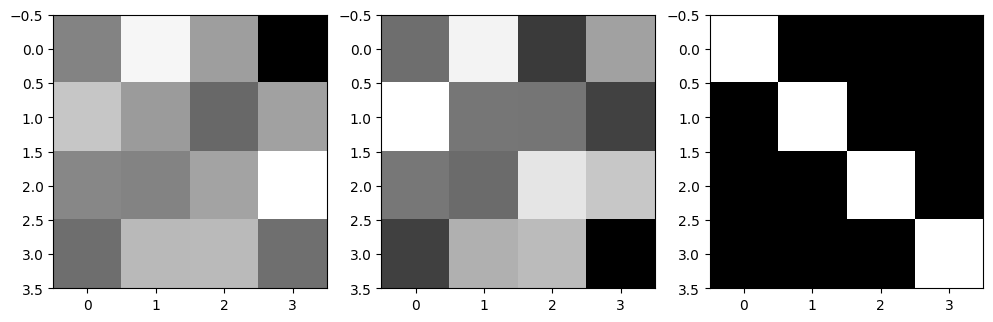

In [37]:
matN=4

A = np.random.randn(matN,matN)
Q = np.zeros((matN,matN))

Q[:,0] = A[:,0]/np.sqrt(np.sum(A[:,0]**2))

for i in range(1,matN):
    # orthogonal vector decomposition:
    v = A[:,i] 
    #orthogonalize to all previous columns in Q
    for j in range(0,i):
        r = Q[:,j]
        v = v - (np.dot(r,v)/np.dot(r,r))*r
    Q[:,i] = v/np.sqrt(np.sum(v**2))
Q@Q.T


fig,ax = plt.subplots(1,3,figsize=(12,5))
ax[0].imshow(A,'gray')
ax[1].imshow(Q,'gray')
ax[2].imshow(Q@Q.T,'gray')

## QR Decomposition
The GS procedure transforms a matrix into an orthogonal matrix $\mathbf{Q}$. $\mathbf{Q}$ is actually obtained using a series of vector-plane reflections known as Householder transformation, but that is simply due to numerical stability.

$\mathbf{Q}$ is different from the original matrix, so we have lost some information there. But the lost information can still be retrieved and stored in another matrix $\mathbf{R}$, that multiplies $\mathbf{Q}$. How do we create $\mathbf{R}$?

$\mathbf{A} = \mathbf{QR}$<br>
$\mathbf{Q}^T\mathbf{A}= \mathbf{Q}^T\mathbf{QR}$<br>
$\mathbf{Q}^T\mathbf{A} = \mathbf{R}$

The beauty of orthogonal matrices is we can solve matrix equations without having to worry about computing the inverse.

We can compute the QR decomposition of a square matrix using:

```
A = np.random.randn(6,6)
Q,R = np.linalg.qr(A)
```

-8.326672684688674e-17

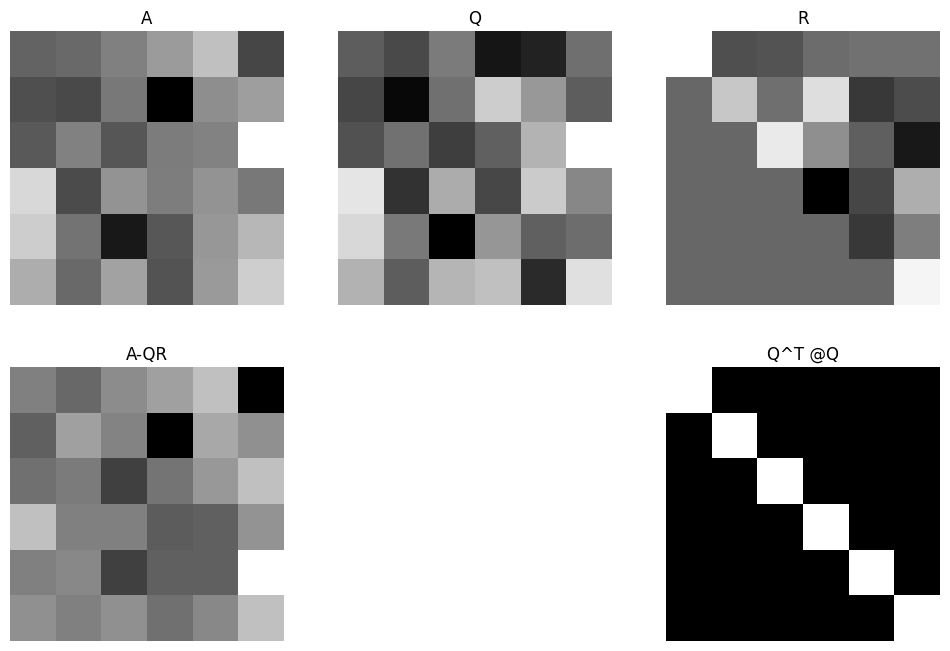

In [92]:
##### A = np.random.randn(6,6)
Q,R = np.linalg.qr(A)
fig,axs = plt.subplot_mosaic([ ['A','B','C'],['D','.','E'] ],figsize=(12,8))

axs['A'].imshow(A,'gray')
axs['A'].set_axis_off()
axs['A'].set_title('A')

axs['B'].imshow(Q,'gray')
axs['B'].set_axis_off()
axs['B'].set_title('Q')

axs['C'].imshow(R,'gray')
axs['C'].set_axis_off()
axs['C'].set_title('R')

axs['D'].imshow(A-Q@R,'gray')
axs['D'].set_axis_off()
axs['D'].set_title('A-QR')

axs['E'].imshow(Q.T@Q,'gray')
axs['E'].set_axis_off()
axs['E'].set_title(r'Q^T @Q')

np.dot(Q[:,4],A[:,3])

Several important features of QR decomposition are visible, including that $\mathbf{A}=\mathbf{QR}$ and that $\mathbf{Q}$ times its transpose gives the identity matrix.

Notice that the $\mathbf{R}$ matrix is upper-triangular, and it is always so, as we orthogonalize $v_n$ wrt $q_{n-1},q_{n-2}$ and so on, the matrix multiplication will produce a zero dot product for all $n$-positions lower than its own in the $\mathbf{Q}^T \mathbf{A}$ matrix.

## Sizes of Q and R
The sizes of $\mathbf{Q}$ and $\mathbf{R}$ depend on the size of matrix $\mathbf{A}$ and on whether QR decomposition is 'economy'/'reduced' or 'full'/'complete'.

'reduced' versus 'full' QR decomposition applies only to tall matrices. The question is: for a tall matrix $M\gt N$, do we create a $\mathbf{Q}$ matrix with $N$ columns or $M$ columns? The former is called the *economy* or *reduced*, and gives a tall $\mathbf{Q}$; and the latter option is called *full* or *complete*, and gives a square $\mathbf{Q}$.

Where is $\mathbf{Q}$ getting the additional orthogonal vectors from in case of the 'full' or 'complete' QR decomposition? 

Consider the following code:<br>
```
A = np.array([ [1,-1] ]).T
Q,R = np.linalg.qr(A,'complete')
Q*np.sqrt(2) # scaled by sqrt(2) to get integers
```

we will get the matrix:<br>
$\begin{bmatrix}-1&1\\ 1&1\end{bmatrix}$

Because it is possible to craft more than $M\gt N$ orthogonal vectors from a matrix with $N$ columns, the rank of $\mathbf{Q}$ is always the maximum possible rank, which is $M$ for all square $\mathbf{Q}$ matrices, and $N$ for the economy $\mathbf{Q}$. However the rank of $\mathbf{R}$ is the same as that of $\mathbf{A}$.

The difference in rank between $\mathbf{Q}$ and $\mathbf{A}$ resulting from orthogonalization means that $\mathbf{Q}$ spans all of $\mathbb{R}^M$ even if the column space of $\mathbf{A}$ is only a lower-dimensional subspace of $\mathbb{R}^M$. This fact is why SVD is so useful for revealing the properties of a matrix, including its rank and nullspace.

**NOTE** <br>
QR decomposition is not unique for all matrix sizes and ranks, that is, it is possible to obtain $\mathbf{A}=\mathbf{Q}_1\mathbf{R}_1$ and $\mathbf{A}=\mathbf{Q}_2\mathbf{R}_2$ where $\mathbf{Q}_1\neq\mathbf{Q}_2$. However, QR decomposition results have the same properties described here.

(40, 40) (40, 4)
[[ 1.00000000e+00  3.87741509e-17 -2.58396480e-17 ...  4.07236878e-17
   1.09142903e-17  1.38365932e-18]
 [ 3.87741509e-17  1.00000000e+00 -2.49398479e-17 ... -3.40838210e-17
   1.21204657e-18 -3.16467647e-18]
 [-2.58396480e-17 -2.49398479e-17  1.00000000e+00 ... -5.59928379e-17
  -8.31581953e-17  1.02402705e-16]
 ...
 [ 4.07236878e-17 -3.40838210e-17 -5.59928379e-17 ...  1.00000000e+00
  -7.33583131e-18  7.43082280e-18]
 [ 1.09142903e-17  1.21204657e-18 -8.31581953e-17 ... -7.33583131e-18
   1.00000000e+00  1.20644723e-17]
 [ 1.38365932e-18 -3.16467647e-18  1.02402705e-16 ...  7.43082280e-18
   1.20644723e-17  1.00000000e+00]]


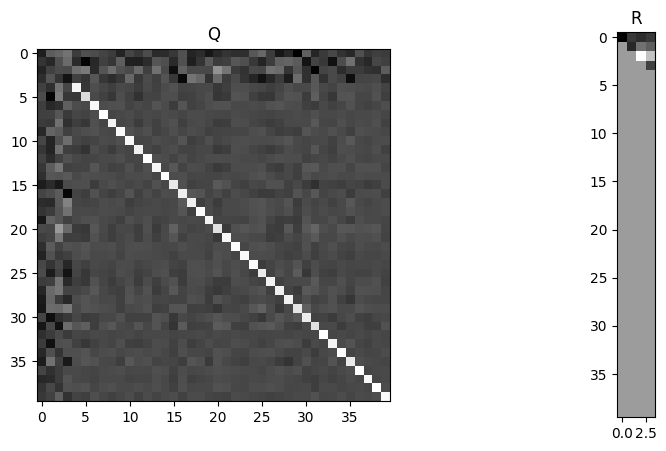

In [26]:
A = np.random.rand(40,4)
Q,R = np.linalg.qr(A,'complete')

print(Q.shape,R.shape)

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(Q,'gray')
ax[0].set_title('Q')
ax[1].imshow(R,'gray')
ax[1].set_title('R')

print(Q.T@Q)

## QR and Inverses
QR decomposition provides a more numerically stable way to compute the matrix inverse.

$\mathbf{A} = \mathbf{QR}$<br>
$\mathbf{A}^{-1} = (\mathbf{QR})^{-1}$<br>
$\mathbf{A}^{-1} = \mathbf{R}^{-1}\mathbf{Q}^{-1}$<br>
$\mathbf{A}^{-1} = \mathbf{R}^{-1}\mathbf{Q}^T$

Thus we can obtain an inverse of $\mathbf{A}$ as the inverse of $\mathbf{R}$ times the transpose $\mathbf{Q}$. $\mathbf{Q}$ is numerically stable due to the Householder reflection algorithm, and $\mathbf{R}$ is numerically stable because it simply results from matrix multiplication.

We still need to invert $\mathbf{R}$ explicitly, but inverting triangular matrices is highly numerically stable when done through a procedure called back substitution. 

Keep in mind though, that matrices that are theoretically invertible but are close to singular are still very difficult to invert; QR decomposition may be *more* numerically stable than the traditional algorithm, but it doesn't guarantee a high quality inverse.